In [162]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Cross Validation

### Doing cross validation, then build pipeline for cross validation and build pipeline for hyperparameters tuning

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [179]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Exploratory Data Analysis

In [180]:
train.shape

(8693, 14)

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [182]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [183]:
df = train.dropna(axis=0)

## Plotting

<Axes: xlabel='Transported', ylabel='count'>

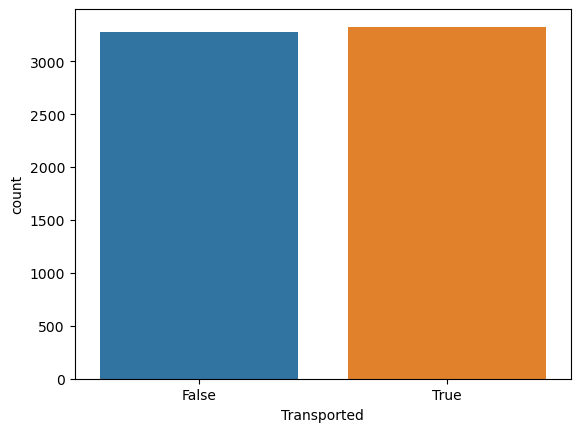

In [184]:
# visualizing Transported data to see distribution
sns.countplot(data=df, x='Transported')

<Axes: xlabel='HomePlanet', ylabel='count'>

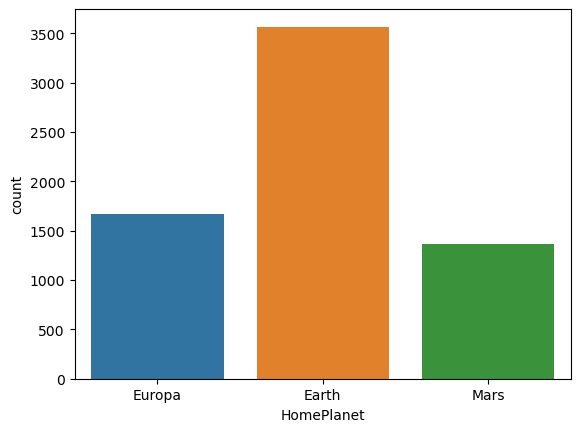

In [185]:
# plotting Homeplaent data 
sns.countplot(data=df, x='HomePlanet')

<Axes: xlabel='CryoSleep', ylabel='count'>

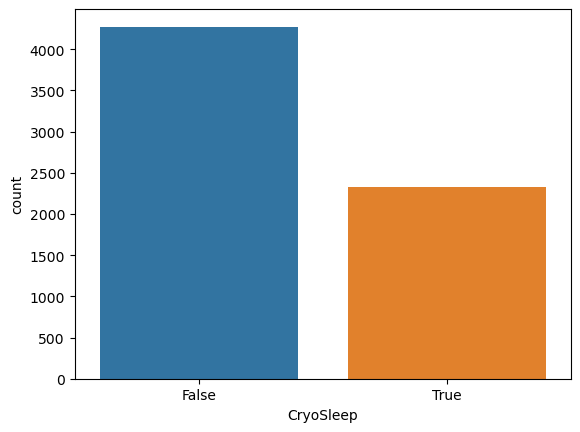

In [186]:
# visualizing CryoSleep data to see distribution
sns.countplot(data=df, x='CryoSleep')

<Axes: xlabel='Destination', ylabel='count'>

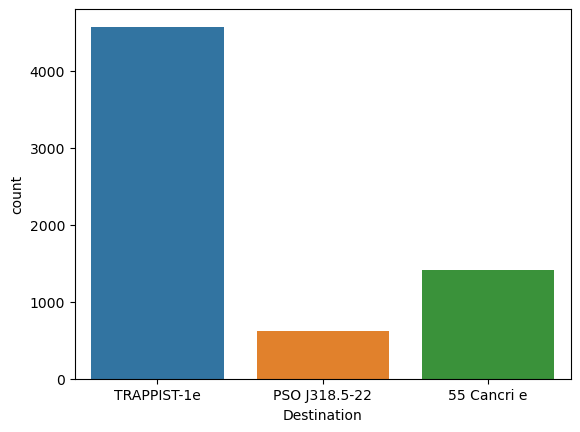

In [187]:
# visualizing Destination data to see distribution
sns.countplot(data=df, x='Destination')

<Axes: xlabel='VIP', ylabel='count'>

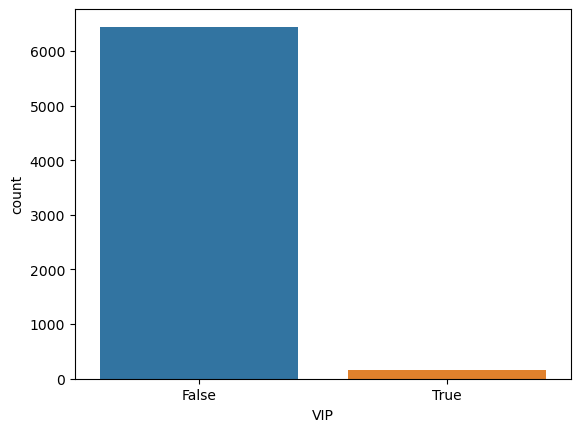

In [188]:
# visualizing VIP data to see distribution
sns.countplot(data=df, x='VIP')

<Axes: xlabel='Transported', ylabel='Age'>

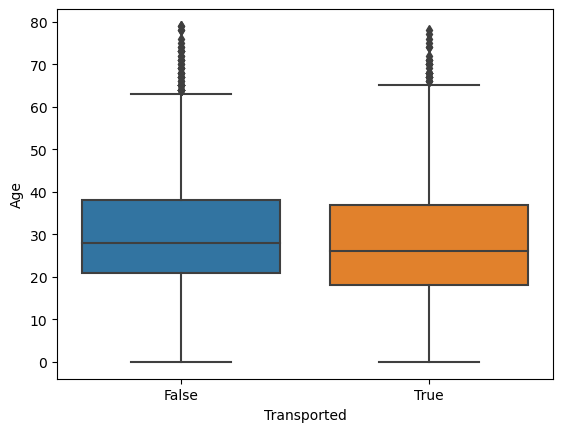

In [189]:
# boxplot transported by age data to see distribution
sns.boxplot(data=df, x='Transported', y='Age')

<Axes: xlabel='Transported', ylabel='FoodCourt'>

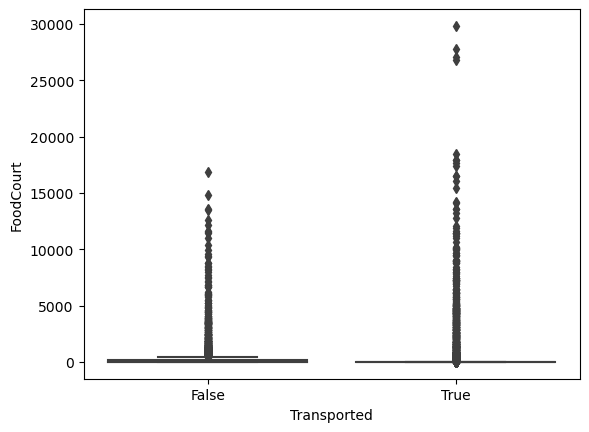

In [190]:
# boxplot plots on FoodCourt spending while on the ship
sns.boxplot(data=df, y='FoodCourt', x='Transported')

<Axes: xlabel='Transported', ylabel='ShoppingMall'>

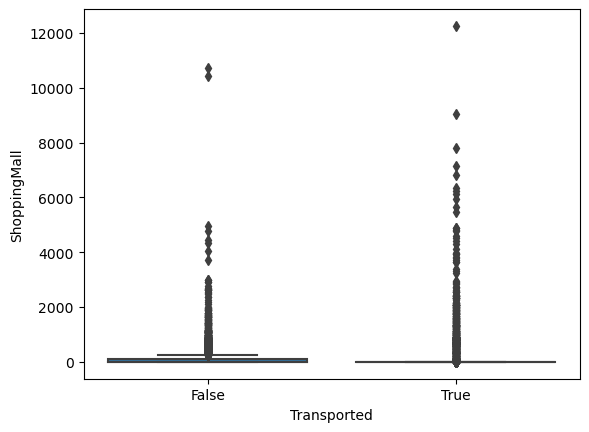

In [191]:
# boxplot plots on ShoppingMall spending while on the ship
sns.boxplot(data=df, y='ShoppingMall', x='Transported')

<Axes: xlabel='Transported', ylabel='VRDeck'>

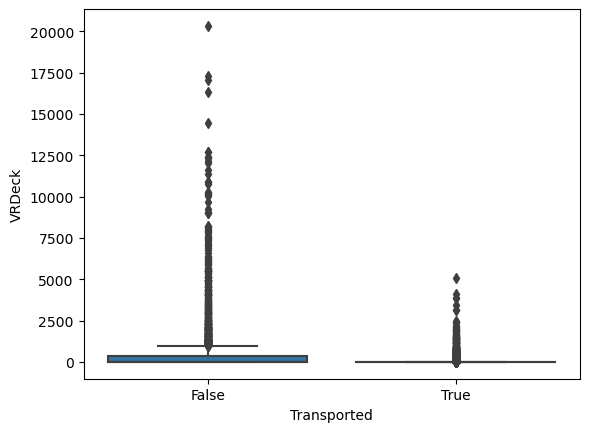

In [192]:
# boxplot plots on VRDeck spending while on the ship
sns.boxplot(data=df, y='VRDeck', x='Transported')

<Axes: xlabel='Transported', ylabel='Spa'>

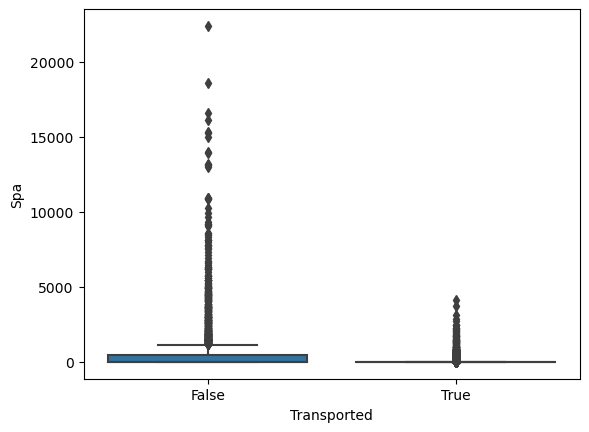

In [193]:
# boxplot plots on spending while on the ship
sns.boxplot(data=df, y='Spa', x='Transported')

<Axes: xlabel='Transported', ylabel='RoomService'>

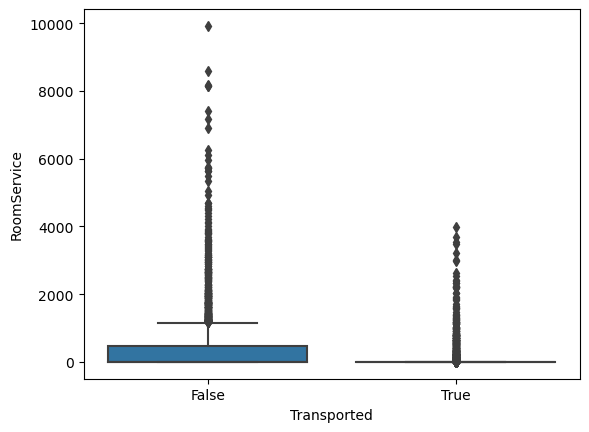

In [194]:
# boxplot plots on RoomService spending while on the ship
sns.boxplot(data=df, y='RoomService', x='Transported')

In [195]:
features = ["HomePlanet", "CryoSleep", "Destination", "Age", "VIP", "RoomService", 
           "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

X = df[features]
y = df.Transported
X.loc()

### Encoding Categorical data

In [196]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['HomePlanet'] = encoder.fit_transform(X['HomePlanet'])
X['CryoSleep'] = encoder.fit_transform(X['CryoSleep'])
X['Destination'] = encoder.fit_transform(X['Destination'])
X['VIP'] = encoder.fit_transform(X['VIP'])


### Scaling data

In [197]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# model training with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

# cross validation techinique
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y=y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print(" [ CV ]  Mean score for RandomForestClassifier",scores.mean())

 [ CV ]  Mean score for RandomForestClassifier 0.7840669215787364


## Pipeline for Cross Validation

In [198]:
from sklearn.pipeline import Pipeline

steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('classifier', RandomForestClassifier(n_estimators=100, random_state=42)))

pipeline = Pipeline(steps)

scores = cross_val_score(pipeline, X_train, y=y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print(" [ CV ]  Mean score for RandomForestClassifier using Pipeline", scores.mean())

 [ CV ]  Mean score for RandomForestClassifier using Pipeline 0.7836913559030761


## Pipeline For model evaluation and parameter tuning ( GridsearchCV and CV )

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

param1 = {}
params1['classifier__n_neighbors'] = [ 5, 10, 15 ]
params1['classifier'] = [KNeighborsClassifier()]

param2 = {}
param2['classifier__C'] = [-100,-10, -1, 1, 10, 100]
param2['classifier'] = [LogisticRegression(random_state=42)]

param3 = {}
param3['classifier__learning_rate'] = [-1, 0.1, 1]
param3['classifier__n_estimators'] = [10, 20, 50]
param3['classifier__max_features'] = [ 2, 4, 6 ]
param3['classifier__max_depth'] = [ 3, 6 ]
param3['classifier'] =[ GradientBoostingClassifier(random_state=42)]

param4 = {}
param4['classifier__n_estimators'] = [10, 20, 50,100]
param4['classifier__max_features'] = [ 3, 4, 5, 6 ]
param4['classifier'] = [RandomForestClassifier(random_state=42)]

params = [ param1, param2, param3, param4 ]

steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('classifier', RandomForestClassifier(random_state=42)))

pipeline = Pipeline(steps)

grid = GridSearchCV(pipeline, params, cv=cv, scoring='roc_auc', n_jobs=-1).fit(X, y)

print("[ GSCV ]", grid.best_score_, grid.best_params_)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[ GSCV ] 0.8799864753574352 {'classifier': GradientBoostingClassifier(max_depth=6, max_features=4, n_estimators=50,
                           random_state=42), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__max_features': 4, 'classifier__n_estimators': 50}


In [200]:
from sklearn.svm import SVC

# Define parameters for Random Forest 
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [RandomForestClassifier(random_state=42)]
#Total 48 parameters to test (4 * 3 * 4)

# Define parameters for support vector machine (SVC)
param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [SVC(random_state=42)]
#Total 20 parameters to test (5 * 4)

# Define parameters for Logistic regression
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [LogisticRegression(random_state=42)]
#Total 40 parameters to test (5 * 2 * 4)

# Define parameters for K neighbors
param4 = {}
param4['classifier__n_neighbors'] = [2,5,10,25,50]
param4['classifier'] = [KNeighborsClassifier()]
#Total 5 parameters to test (5)

# Define parameters for Gradient boosting
param5 = {}
param5['classifier__n_estimators'] = [10, 50, 100, 250]
param5['classifier__max_depth'] = [5, 10, 20]
param5['classifier'] = [GradientBoostingClassifier(random_state=42)]
#Total 12 parameters to test (4 * 3)

params = [param1, param2, param3, param4, param5]

steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('classifier', RandomForestClassifier(random_state=42)))

pipeline = Pipeline(steps)

grid = GridSearchCV(pipeline, params, cv=cv, scoring='roc_auc', n_jobs=-1).fit(X, y)

print("[ GSCV ]", grid.best_score_, grid.best_params_)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[ GSCV ] 0.8797718496793466 {'classifier': GradientBoostingClassifier(max_depth=5, random_state=42), 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
